# the evaluation code is copyed from the orignal paper: https://github.com/HHHit/DL-based-Tumor-Classification/blob/master/model/utils/show_result.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools, os
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score



In [9]:
predicted_label = []
true_label = []
for i in range(0,10):
    
    fold_num = "fold_%s" % str(i).zfill(2)
    save_path = './fold_result_c5/%s' % fold_num
    
    true_label_tmp = np.array(pd.read_csv(os.path.join(save_path, 'test_true_label.csv'), index_col = 0)['y_true']) + 1.0
    predicted_label_tmp = np.array(pd.read_csv(os.path.join(save_path, 'test_pred_label.csv'), index_col = 0)['y_pred']) + 1.0

    
    predicted_label.append(predicted_label_tmp)
    true_label.append(true_label_tmp)

true_label_all = np.concatenate(true_label, axis=0)
predicted_label_all = np.concatenate(predicted_label, axis=0)


In [10]:
confusion_matrix(true_label_all, predicted_label_all)

array([[  77,    1,    0, ...,    0,    0,    0],
       [   1,  411,    2, ...,    0,    1,    0],
       [   1,    2, 1205, ...,    0,    2,    0],
       ...,
       [   0,    0,    0, ...,  190,    8,    0],
       [   0,    0,    1, ...,   11,   45,    0],
       [   0,    0,    0, ...,    0,    0,   79]])

In [11]:
classes = ['ACC', 'BLCA', 'BRCA', 'CESC', 'CHOL', 'COAD', 'DLBC', 'ESCA', 'GBM', 'HNSC',
           'KICH', 'KIRC', 'KIRP', 'LAML', 'LGG', 'LIHC', 'LUAD', 'LUSC', 'MESO', 'OV', 'PAAD', 'PCPG', 'PRAD',
           'READ', 'SARC', 'SKCM', 'STAD', 'TGCT', 'THCA', 'THYM', 'UCEC', 'UCS', 'UVM']

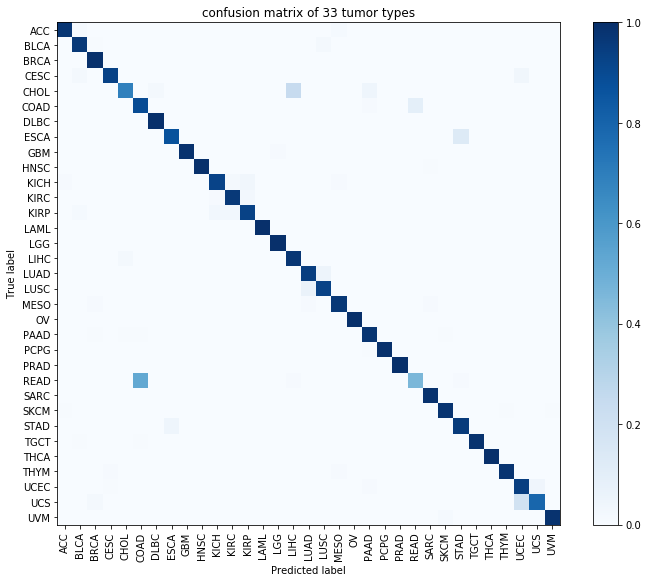

In [12]:
def draw_confusion_matrix(predicted_label_all,true_label_all):
    # predicted_label = np.array(pd.read_csv(predicted_label_path, header=None)).astype(np.int)
    # true_label = np.array(pd.read_csv(true_label_path, header=None)).astype(np.int)
    cnf_matrix = confusion_matrix(true_label_all, predicted_label_all)
    cnf_matrix = cnf_matrix/cnf_matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('confusion matrix of 33 tumor types')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return cnf_matrix


cnf_matrix = draw_confusion_matrix(predicted_label_all,true_label_all)
precison_s = precision_score(true_label_all, predicted_label_all, average='weighted')
recall_s = recall_score(true_label_all, predicted_label_all, average='weighted')
f1 = f1_score(true_label_all, predicted_label_all, average='weighted')
accuracy = accuracy_score(true_label_all, predicted_label_all)
accuracy_each_class = cnf_matrix.diagonal()

In [13]:
accuracy,recall_s,precison_s,f1

(0.9626651349798966,
 0.9626651349798966,
 0.9622409800554661,
 0.9622382786853877)

In [14]:
pd.DataFrame(accuracy_each_class,index = classes).to_csv('each_class_acc_c5.csv')

In [15]:
pd.DataFrame(accuracy_each_class,index = classes)

,0
ACC,0.974684
BLCA,0.962529
BRCA,0.994224
CESC,0.928803
CHOL,0.688889
COAD,0.893293
DLBC,1.000000
ESCA,0.867347
GBM,0.988304
HNSC,0.992933
